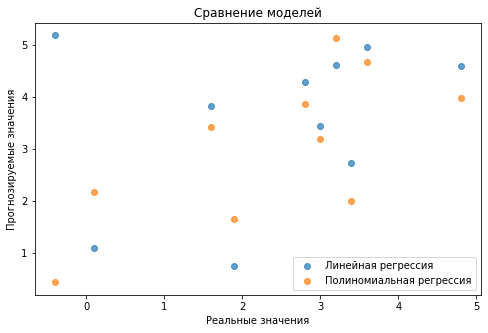

Лучшая модель: Полиномиальная регрессия с MSE = 1.7014


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Загрузка данных
df = pd.read_csv("infl.csv")

# Преобразование данных
df["Инфляция"] = df["Инфляция"].str.replace("%", "").astype(float)
df["Безработица"] = df["Безработица"].str.replace("%", "").astype(float)
df["Прогноз Инфляции"] = df["Прогноз Инфляции"].str.replace("%", "").astype(float)

# Выбор входных и выходных переменных
X = df[["Год", "ВВП", "Безработица"]]
y = df["Инфляция"]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred_lin)

# Полиномиальная регрессия (2-й степени)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, y_pred_poly)

# Выбор лучшей модели
if lin_mse < poly_mse:
    best_model = lin_reg
    best_mse = lin_mse
    model_type = "Линейная регрессия"
else:
    best_model = poly_reg
    best_mse = poly_mse
    model_type = "Полиномиальная регрессия"

# Визуализация результатов
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lin, label="Линейная регрессия", alpha=0.7)
plt.scatter(y_test, y_pred_poly, label="Полиномиальная регрессия", alpha=0.7)
plt.xlabel("Реальные значения")
plt.ylabel("Прогнозируемые значения")
plt.legend()
plt.title("Сравнение моделей")
plt.show()

# Вывод результата
print(f"Лучшая модель: {model_type} с MSE = {best_mse:.4f}")
